# ANN

In [1]:
import json
import os
from copy import deepcopy
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

%load_ext autoreload
%autoreload 2

2025-04-01 21:01:32.949813: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-01 21:01:32.956435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743555692.964732  126053 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743555692.967407  126053 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-01 21:01:32.975832: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## compare ANN with cys-ANN

In [2]:
import pandas as pd
infile = '/home/yuan/results/epitope/epi_top_features.txt'
df = pd.read_csv(infile, sep='\t', header=0, index_col=None)
# balance the number of epitopes and non-epitopes
# shuffle rows
df = df.sample(frac=1)
df.head()

,seq,label,mean_hydro_ph7,mean_hydro,mean_polar,mean_polar_stab,mean_VDWV,median_hydro_ph7,median_hydro,median_polar,...,has_N,has_D,has_C,has_I,has_L,has_K,has_F,has_T,has_Y,has_V
1846091,YHNLWAQRL,1,39.000000,1.052222,8.055556,0.217778,4.582222,41.0,0.61,8.10,...,1,0,0,0,1,0,0,0,1,0
2053657,SGEGTIPVR,1,10.222222,0.755556,8.633333,0.118778,2.647778,0.0,0.47,9.00,...,0,0,0,1,0,0,0,1,0,1
1688882,TENLLLYADINGNLYP,1,28.187500,0.993125,8.187500,0.154312,3.416875,27.0,1.07,8.05,...,1,1,0,1,1,0,0,1,1,0
1412142,APAPVQMASAAPTKP,1,9.733333,0.973333,8.246667,0.112267,2.415333,13.0,0.61,8.10,...,0,0,0,0,0,1,0,1,0,1
1410830,GIHVIPTLNGDDRHK,1,11.933333,0.892000,9.066667,0.150067,3.270000,0.0,0.61,9.00,...,1,1,0,1,1,1,0,1,0,1


In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# original ANN model
from compare_model import CompareModel

y1, pred1 = CompareModel.predict(df, '../models/epitopes_ann.keras')

X: (2490831, 46) float16
y: (2490831,) float16
labels: Counter({np.float16(1.0): 1798795, np.float16(0.0): 692036})


I0000 00:00:1743555702.125094  126053 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9174 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1743555703.014634  126177 service.cc:148] XLA service 0x704778015be0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743555703.014664  126177 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-04-01 21:01:43.018155: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743555703.028748  126177 cuda_dnn.cc:529] Loaded cuDNN version 90800


  131/77839 ━━━━━━━━━━━━━━━━━━━━ 30s 386us/step     

E0000 00:00:1743555703.415268  126177 buffer_comparator.cc:157] Difference at 16: 0, expected 260.803
E0000 00:00:1743555703.415292  126177 buffer_comparator.cc:157] Difference at 17: 0, expected 274.951
E0000 00:00:1743555703.415294  126177 buffer_comparator.cc:157] Difference at 18: 0, expected 253.659
E0000 00:00:1743555703.415295  126177 buffer_comparator.cc:157] Difference at 19: 0, expected 257.607
E0000 00:00:1743555703.415296  126177 buffer_comparator.cc:157] Difference at 20: 0, expected 250.262
E0000 00:00:1743555703.415297  126177 buffer_comparator.cc:157] Difference at 21: 0, expected 258.782
E0000 00:00:1743555703.415298  126177 buffer_comparator.cc:157] Difference at 22: 0, expected 253.591
E0000 00:00:1743555703.415300  126177 buffer_comparator.cc:157] Difference at 23: 0, expected 258.759
E0000 00:00:1743555703.415301  126177 buffer_comparator.cc:157] Difference at 24: 0, expected 259.406
E0000 00:00:1743555703.415302  126177 buffer_comparator.cc:157] Difference at 25: 

77839/77839 ━━━━━━━━━━━━━━━━━━━━ 28s 355us/step


E0000 00:00:1743555731.036397  126180 buffer_comparator.cc:157] Difference at 16: 0, expected 264.849
E0000 00:00:1743555731.036422  126180 buffer_comparator.cc:157] Difference at 17: 0, expected 265.149
E0000 00:00:1743555731.036424  126180 buffer_comparator.cc:157] Difference at 18: 0, expected 273.266
E0000 00:00:1743555731.036426  126180 buffer_comparator.cc:157] Difference at 19: 0, expected 247.175
E0000 00:00:1743555731.036427  126180 buffer_comparator.cc:157] Difference at 20: 0, expected 256.057
E0000 00:00:1743555731.036428  126180 buffer_comparator.cc:157] Difference at 21: 0, expected 259.822
E0000 00:00:1743555731.036429  126180 buffer_comparator.cc:157] Difference at 22: 0, expected 261.887
E0000 00:00:1743555731.036430  126180 buffer_comparator.cc:157] Difference at 23: 0, expected 257.228
E0000 00:00:1743555731.036431  126180 buffer_comparator.cc:157] Difference at 24: 0, expected 261.437
E0000 00:00:1743555731.036432  126180 buffer_comparator.cc:157] Difference at 25: 

In [9]:
# without cys
feature = 'has_C'
# df1 = df[~((df[feature]==1) & (df['label']==1))]
df1 = df[df[feature]==0]
y_not, pred_not = CompareModel.predict(df1, '../models/epitopes_ann_notCys.keras')
# has cys
# df2 = df[~((df[feature]==0) & (df['label']==1))]
df2 = df[df[feature]==1]
y_has, pred_has = CompareModel.predict(df2, '../models/epitopes_ann_hasCys.keras')

X: (2120189, 46) float16
y: (2120189,) float16
labels: Counter({np.float16(1.0): 1586519, np.float16(0.0): 533670})
66256/66256 ━━━━━━━━━━━━━━━━━━━━ 26s 387us/step


E0000 00:00:1743555885.533709  126179 buffer_comparator.cc:157] Difference at 16: -nan, expected 262.997
E0000 00:00:1743555885.533731  126179 buffer_comparator.cc:157] Difference at 17: -nan, expected 271.784
E0000 00:00:1743555885.533733  126179 buffer_comparator.cc:157] Difference at 18: -nan, expected 251.113
E0000 00:00:1743555885.533734  126179 buffer_comparator.cc:157] Difference at 19: -nan, expected 252.107
E0000 00:00:1743555885.533735  126179 buffer_comparator.cc:157] Difference at 20: -nan, expected 245.646
E0000 00:00:1743555885.533736  126179 buffer_comparator.cc:157] Difference at 21: -nan, expected 253.441
E0000 00:00:1743555885.533737  126179 buffer_comparator.cc:157] Difference at 22: -nan, expected 253.179
E0000 00:00:1743555885.533738  126179 buffer_comparator.cc:157] Difference at 23: -nan, expected 262.705
E0000 00:00:1743555885.533739  126179 buffer_comparator.cc:157] Difference at 24: -nan, expected 255.74
E0000 00:00:1743555885.533740  126179 buffer_comparator.

X: (370642, 46) float16
y: (370642,) float16
labels: Counter({np.float16(1.0): 212276, np.float16(0.0): 158366})
11583/11583 ━━━━━━━━━━━━━━━━━━━━ 5s 389us/step


E0000 00:00:1743555904.619717  126180 buffer_comparator.cc:157] Difference at 16: 1.30078, expected 261.008
E0000 00:00:1743555904.619741  126180 buffer_comparator.cc:157] Difference at 17: -0.977539, expected 260.172
E0000 00:00:1743555904.619743  126180 buffer_comparator.cc:157] Difference at 18: 1.48438, expected 265.06
E0000 00:00:1743555904.619745  126180 buffer_comparator.cc:157] Difference at 19: 0.889648, expected 245.157
E0000 00:00:1743555904.619746  126180 buffer_comparator.cc:157] Difference at 20: 1.72754, expected 242.955
E0000 00:00:1743555904.619747  126180 buffer_comparator.cc:157] Difference at 21: 2.89648, expected 253.055
E0000 00:00:1743555904.619748  126180 buffer_comparator.cc:157] Difference at 22: -2.04102, expected 250.135
E0000 00:00:1743555904.619749  126180 buffer_comparator.cc:157] Difference at 23: 2.00391, expected 262.28
E0000 00:00:1743555904.619750  126180 buffer_comparator.cc:157] Difference at 24: 1.90527, expected 253.655
E0000 00:00:1743555904.619

In [10]:
import numpy as np

print(y_not.shape, y_has.shape)
y2 = np.concatenate([y_not, y_has])
print(y2.shape)

print(pred_not.shape, pred_has.shape)
pred2 = np.concatenate([pred_not, pred_has])
print(pred2.shape)

(2120189,) (370642,)
(2490831,)
(2120189, 1) (370642, 1)
(2490831, 1)


In [26]:
m1 = pd.DataFrame({ 'y': y1, 'pred': pred1.flatten() })
m1.name='ANN'
m2 = pd.DataFrame({ 'y': y2, 'pred': pred2.flatten() })
m2.name='Cys-ANN'

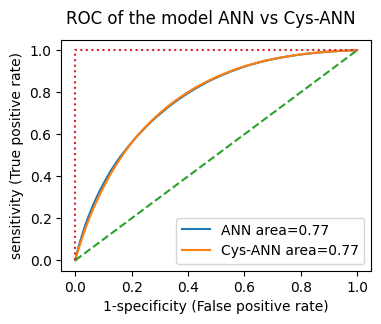

In [27]:
#  ROC
CompareModel.plot_roc(m1, m2)

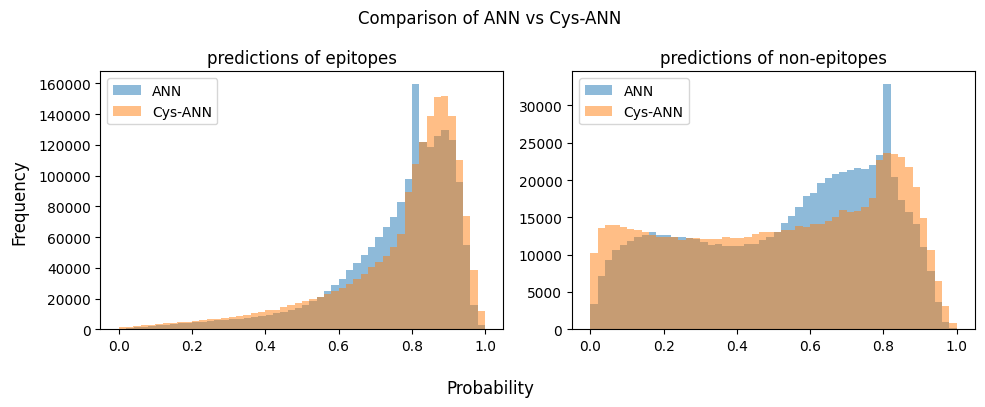

In [39]:
# Plot histograms
CompareModel.plot_hist(m1, m2)